In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Steps:
 - [x] check if changing to tensors with gradient automatically changes the inputs
 - [ ] get multidimensional regression to work
 - [ ] check if gradient is calculated correctly for the inputs
 - [ ] check if in an toy example we could guess a missing parameter

In [2]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [3]:
optimizer.__dict__

{'defaults': {'lr': 0.001,
  'momentum': 0,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False,
  'maximize': False,
  'foreach': None,
  'differentiable': False},
 '_zero_grad_profile_name': 'Optimizer.zero_grad#SGD.zero_grad',
 'state': defaultdict(dict, {}),
 'param_groups': [{'params': [Parameter containing:
    tensor([[-0.4500]], requires_grad=True),
    Parameter containing:
    tensor([0.6073], requires_grad=True)],
   'lr': 0.001,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False}],
 '_warned_capturable_if_run_uncaptured': True}

Epoch [5/60], Loss: 11.1213
Epoch [10/60], Loss: 4.6060
Epoch [15/60], Loss: 1.9666
Epoch [20/60], Loss: 0.8973
Epoch [25/60], Loss: 0.4641
Epoch [30/60], Loss: 0.2886
Epoch [35/60], Loss: 0.2175
Epoch [40/60], Loss: 0.1887
Epoch [45/60], Loss: 0.1770
Epoch [50/60], Loss: 0.1723
Epoch [55/60], Loss: 0.1704
Epoch [60/60], Loss: 0.1696


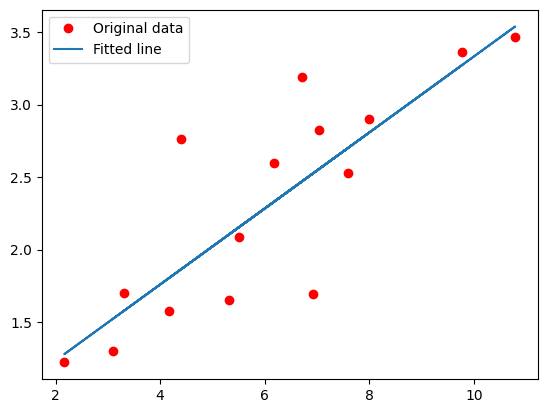

In [4]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.tensor(x_train, requires_grad=True)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

#### Check if we could create our own linear regression where we recover a feature

#### Always keep normalization in mind

In [5]:
# Hyper-parameters
input_size = 2
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[1, 2], [2, 3], [4, 5], [14, 3], [1, 12.312], [1, 2.345], 
                    [5, 2], [12, 4], [12, 5], [19, 12], [38, 5], 
                    [12, 1], [12, 32], [11, 1], [1, 1]], dtype=np.float32)

y_train = (x_train * np.array([2, 4], dtype=np.float32)).sum(axis=1).reshape(-1, 1) + 0.1 * (np.random.rand(15) - 0.5)
y_train = np.array(y_train, dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

/home/tobias/programming/web_development/dataframetrainer/.venv/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([15, 15])) that is different to the input size (torch.Size([15, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [5/60], Loss: 209.2085
Epoch [10/60], Loss: 49.4358
Epoch [15/60], Loss: 14.3858
Epoch [20/60], Loss: 4.3363
Epoch [25/60], Loss: 1.4448
Epoch [30/60], Loss: 0.6117
Epoch [35/60], Loss: 0.3706
Epoch [40/60], Loss: 0.2997
Epoch [45/60], Loss: 0.2777
Epoch [50/60], Loss: 0.2698
Epoch [55/60], Loss: 0.2661
Epoch [60/60], Loss: 0.2634


ValueError: x has 2 columns but y has 15 columns

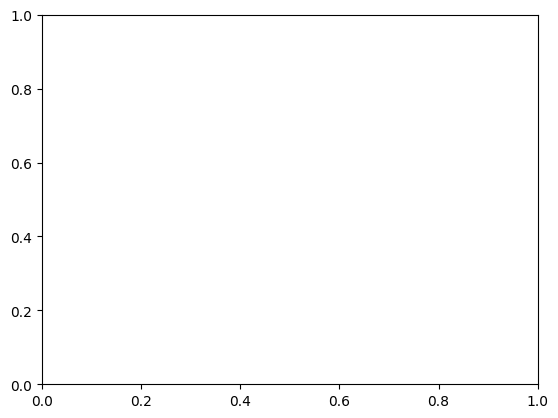

In [6]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.tensor(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

#### Set the model parameters directly

In [7]:
from collections import OrderedDict
from torch.nn.parameter import Parameter

d = OrderedDict({'weight': Parameter(data=torch.tensor([[2, 3.9]], dtype=torch.float32), requires_grad=True),
                 'bias': Parameter(data=torch.tensor([0], dtype=torch.float32), requires_grad=True)})
model._parameters = d

#### Now let us remove one parameter and check whether we still find an acceptable solution

In [8]:
# Hyper-parameters
input_size = 2
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[1, 2], [2, 3], [4, 5], [14, 3], [1, 12.312], [1, 2.345], 
                    [5, 2], [12, 4], [12, 5], [19, 12], [38, 5], 
                    [12, 1], [12, 32], [11, 1], [1, 1]], dtype=np.float32)

y_train = (x_train * np.array([2, 4], dtype=np.float32)).sum(axis=1).reshape(-1, 1) + 0.1 * (np.random.rand(15) - 0.5)
y_train = np.array(y_train, dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

#### manipulate the training data to exclude one feature

In [9]:
x_train.shape

(15, 2)

In [10]:
np.vstack((x_train[:, 0], np.random.rand(x_train.shape[0]))).reshape(x_train.shape)

array([[ 1.        ,  2.        ],
       [ 4.        , 14.        ],
       [ 1.        ,  1.        ],
       [ 5.        , 12.        ],
       [12.        , 19.        ],
       [38.        , 12.        ],
       [12.        , 11.        ],
       [ 1.        ,  0.49354996],
       [ 0.1047021 ,  0.05285186],
       [ 0.35004309,  0.45956156],
       [ 0.19466433,  0.70584932],
       [ 0.26887613,  0.52793477],
       [ 0.8987361 ,  0.78190171],
       [ 0.34350052,  0.36012926],
       [ 0.66747035,  0.18697887]])

Epoch [5/60], Loss: 96.1083
Epoch [10/60], Loss: 19.9539
Epoch [15/60], Loss: 5.8196
Epoch [20/60], Loss: 1.7766
Epoch [25/60], Loss: 0.6131
Epoch [30/60], Loss: 0.2778
Epoch [35/60], Loss: 0.1805
Epoch [40/60], Loss: 0.1517
Epoch [45/60], Loss: 0.1427
Epoch [50/60], Loss: 0.1393
Epoch [55/60], Loss: 0.1375
Epoch [60/60], Loss: 0.1362


ValueError: x has 2 columns but y has 15 columns

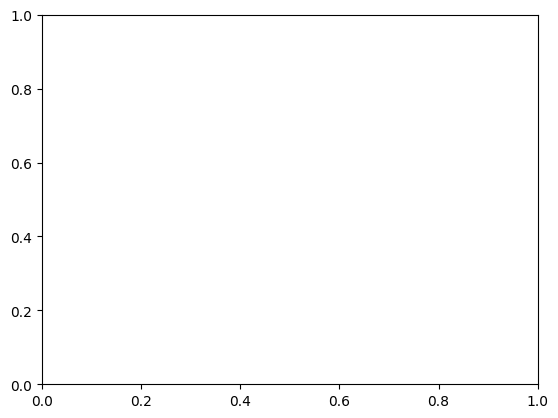

In [11]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.tensor(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

#### Load Chess Elo and try to implement model

In [12]:
import pandas as pd
import numpy as np
import pandas as pd

import torch 
import torch.nn as nn

In [13]:
df = pd.read_csv("data/training_data.csv")
df.columns = ['month', 'white', 'black', 'score']

In [116]:
df["black"].value_counts()

4037    140
1512    135
4850    133
1286    127
64      127
       ... 
781       1
2394      1
7303      1
6175      1
7097      1
Name: black, Length: 6582, dtype: int64

In [122]:
s = df[["white", "black"]].stack().value_counts()

In [126]:
s[s>10]

4850    280
1594    276
4037    272
1286    270
64      258
       ... 
875      11
67       11
525      11
7356     11
4378     11
Length: 2888, dtype: int64

In [130]:
df[df["white"] == 4850]["score"].value_counts()

1.0    67
0.5    62
0.0    18
Name: score, dtype: int64

In [131]:
df[df["black"] == 4850]["score"].value_counts()

0.5    80
1.0    32
0.0    21
Name: score, dtype: int64

In [117]:
df["white"].value_counts() + df["black"].value_counts()

1       52.0
2        NaN
3        8.0
4       46.0
5       13.0
        ... 
8627     8.0
8628     NaN
8629    63.0
8630     6.0
8631    11.0
Length: 7301, dtype: float64

In [76]:
batch_size = 64
lr = 0.05

In [15]:
player_ids = list(set(list(df["white"].unique()) + list(df["black"].unique())))

In [16]:
mapping_srs = pd.Series(player_ids).reset_index().rename(columns={0: 'id'}).set_index('id')['index']

In [17]:
df['white_mapped'] = df['white'].map(mapping_srs)
df['black_mapped'] = df['black'].map(mapping_srs)

In [18]:
player_tensors = torch.randn(len(mapping_srs), 3, requires_grad=True)

In [104]:
class NeuralNet(nn.Module):
    def __init__(self, input_size1, input_size2, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size1 + input_size2, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        # self.fc1 = nn.Linear(input_size1 + input_size2, num_classes) 
        self.sigmoid = nn.Softmax()
    
    def forward(self, x1, x2):
        x = torch.cat((x1, x2), axis=1)
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return self.sigmoid(out)

In [103]:
predicted

tensor([[0.0663, 0.1583, 0.0792,  ..., 0.1071, 0.1450, 0.1259],
        [0.0572, 0.2170, 0.0498,  ..., 0.1619, 0.1976, 0.1531],
        [0.0669, 0.1131, 0.1162,  ..., 0.1342, 0.0725, 0.0608],
        ...,
        [0.0987, 0.0685, 0.0992,  ..., 0.1087, 0.1046, 0.2367],
        [0.1026, 0.1191, 0.1456,  ..., 0.1587, 0.0965, 0.1224],
        [0.1076, 0.1181, 0.0968,  ..., 0.1316, 0.1445, 0.2016]],
       grad_fn=<SoftmaxBackward0>)

In [105]:
episodes = 20
lr_p = 0.1
lr = 0.1

player_features = 5
model = NeuralNet(player_features, player_features, 10, 3)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
player_tensors = torch.randn(len(mapping_srs), player_features, requires_grad=True)

for _ in range(episodes):
    for idx in range(int(len(df) / batch_size)):
        curr_df = df.iloc[:, :]
        # curr_df = df.iloc[idx*batch_size:(idx+1)*batch_size]
        white_tensors = player_tensors[curr_df["white_mapped"].values, :]
        black_tensors = player_tensors[curr_df["black_mapped"].values, :]
        predicted = model(white_tensors, black_tensors)
        result = torch.from_numpy(curr_df['score'].values).reshape(-1, 1)
        result_tensor = torch.cat((torch.where(result == 1, 1., 0.), torch.where(result == 0, 1., 0.), torch.where(result == 0.5, 1., 0.)), axis=1)
        loss = criterion(result_tensor, predicted)
        
        optimizer.zero_grad()
        loss.backward()
        player_tensors = player_tensors - lr_p * player_tensors.grad
        player_tensors.grad = torch.zeros(player_tensors.shape)
        optimizer.step()
        print(f"This is the loss {loss}")

/tmp/ipykernel_44181/1159121841.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.sigmoid(out)


This is the loss 1.2182813882827759
This is the loss 1.183905005455017
This is the loss 1.1473933458328247
This is the loss 1.1238528490066528
This is the loss 1.114347219467163
This is the loss 1.1116005182266235
This is the loss 1.110958456993103
This is the loss 1.110823154449463
This is the loss 1.1107958555221558
This is the loss 1.1107903718948364
This is the loss 1.1107889413833618
This is the loss 1.1107887029647827
This is the loss 1.1107887029647827
This is the loss 1.1107885837554932
This is the loss 1.1107887029647827
This is the loss 1.1107887029647827
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.1107885837554932
This is the loss 1.110788583

This is the loss 1.1093276739120483
This is the loss 1.1092990636825562
This is the loss 1.109374761581421
This is the loss 1.1093741655349731
This is the loss 1.1093339920043945
This is the loss 1.109295129776001
This is the loss 1.1093289852142334
This is the loss 1.1092890501022339
This is the loss 1.109213948249817
This is the loss 1.109208345413208
This is the loss 1.1091880798339844
This is the loss 1.109198808670044
This is the loss 1.1092673540115356
This is the loss 1.1093376874923706
This is the loss 1.1092873811721802
This is the loss 1.1092172861099243
This is the loss 1.1091842651367188


In [112]:
result_tensor.numpy().sum(axis=0)

array([21163., 15224., 28666.], dtype=float32)

In [108]:
result_tensor.sum(axis=0)

tensor([21163., 15224., 28666.])

In [95]:
torch.argwhere(predicted[:, 2] < 0.9)

tensor([], size=(0, 1), dtype=torch.int64)

In [80]:
episodes = 5
lr_p = 0.1

for _ in range(episodes):
    for idx in range(int(len(df) / batch_size)):
        curr_df = df.iloc[idx*batch_size:(idx+1)*batch_size]
        white_tensors = player_tensors[curr_df["white_mapped"].values, :]
        black_tensors = player_tensors[curr_df["black_mapped"].values, :]
        predicted = model(white_tensors, black_tensors)
        result = torch.from_numpy(curr_df['score'].values).reshape(-1, 1)
        result_tensor = torch.cat((torch.where(result == 1, 1., 0.), torch.where(result == 0, 1., 0.), torch.where(result == 0.5, 1., 0.)), axis=1)
        loss = criterion(result_tensor, predicted)
        
        optimizer.zero_grad()
        loss.backward()
        # player_tensors = player_tensors - lr_p * player_tensors.grad
        # player_tensors.grad = torch.zeros(player_tensors.shape)
        optimizer.step()
        print(f"This is the loss {loss}")

/tmp/ipykernel_44181/796299778.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.sigmoid(out)


This is the loss 1.1306262016296387
This is the loss 1.253980040550232
This is the loss 1.1307001113891602
This is the loss 1.1923465728759766
This is the loss 1.2386894226074219
This is the loss 1.2694356441497803
This is the loss 1.1460760831832886
This is the loss 1.1308242082595825
This is the loss 1.099818468093872
This is the loss 1.0536296367645264
This is the loss 1.022853970527649
This is the loss 1.1305949687957764
This is the loss 1.0844494104385376
This is the loss 1.0844378471374512
This is the loss 1.0844488143920898
This is the loss 1.0535764694213867
This is the loss 1.1460766792297363
This is the loss 1.1307612657546997
This is the loss 1.2079193592071533
This is the loss 1.0382024049758911
This is the loss 1.06908118724823
This is the loss 1.1461893320083618
This is the loss 1.0226709842681885
This is the loss 1.1152725219726562
This is the loss 1.1461800336837769
This is the loss 1.03819739818573
This is the loss 1.1922999620437622
This is the loss 1.0226953029632568

This is the loss 1.1613783836364746
This is the loss 1.1614211797714233
This is the loss 1.0532267093658447
This is the loss 1.161438226699829
This is the loss 1.1149879693984985
This is the loss 1.068814992904663
This is the loss 1.1305303573608398
This is the loss 1.0222729444503784
This is the loss 1.176834225654602
This is the loss 1.068672776222229
This is the loss 1.1305357217788696
This is the loss 1.0997061729431152
This is the loss 1.0685932636260986
This is the loss 1.1459163427352905
This is the loss 1.0377960205078125
This is the loss 1.0840191841125488
This is the loss 1.099564552307129
This is the loss 1.2385518550872803
This is the loss 1.1304737329483032
This is the loss 1.0532573461532593
This is the loss 1.2231049537658691
This is the loss 1.223320484161377
This is the loss 1.1150282621383667
This is the loss 1.115056037902832
This is the loss 1.1768900156021118
This is the loss 1.207658052444458
This is the loss 1.0532102584838867
This is the loss 1.1151083707809448


This is the loss 1.1612948179244995
This is the loss 1.1767724752426147
This is the loss 1.083901047706604
This is the loss 1.1149356365203857
This is the loss 1.0529162883758545
This is the loss 0.9755921363830566
This is the loss 1.0220205783843994
This is the loss 1.099382758140564
This is the loss 1.1149024963378906
This is the loss 1.0529963970184326
This is the loss 1.192193865776062
This is the loss 1.0839089155197144
This is the loss 1.0838690996170044
This is the loss 1.1458388566970825
This is the loss 0.9756478667259216
This is the loss 1.0374555587768555
This is the loss 1.0994021892547607
This is the loss 1.0374977588653564
This is the loss 1.192284107208252
This is the loss 1.2077072858810425
This is the loss 1.1612496376037598
This is the loss 1.114937663078308
This is the loss 1.0529024600982666
This is the loss 1.1303225755691528
This is the loss 1.1148333549499512
This is the loss 1.068429946899414
This is the loss 1.1458362340927124
This is the loss 1.161397337913513

This is the loss 1.0837559700012207
This is the loss 1.0527374744415283
This is the loss 1.1457314491271973
This is the loss 1.1302924156188965
This is the loss 1.2078325748443604
This is the loss 1.037265658378601
This is the loss 1.0682910680770874
This is the loss 1.1457997560501099
This is the loss 1.0216922760009766
This is the loss 1.1147462129592896
This is the loss 1.145792007446289
This is the loss 1.0372639894485474
This is the loss 1.1922048330307007
This is the loss 1.0217115879058838
This is the loss 1.1457618474960327
This is the loss 1.052825927734375
This is the loss 1.1457716226577759
This is the loss 1.0528136491775513
This is the loss 1.1612160205841064
This is the loss 1.0681848526000977
This is the loss 1.06824791431427
This is the loss 1.1457397937774658
This is the loss 1.0836994647979736
This is the loss 1.0992411375045776
This is the loss 0.975179135799408
This is the loss 1.1302251815795898
This is the loss 1.099223256111145
This is the loss 1.0062425136566162

This is the loss 1.0679926872253418
This is the loss 1.1456336975097656
This is the loss 1.037023663520813
This is the loss 1.083500862121582
This is the loss 1.0990753173828125
This is the loss 1.238702654838562
This is the loss 1.1301203966140747
This is the loss 1.052549958229065
This is the loss 1.2231872081756592
This is the loss 1.223322868347168
This is the loss 1.114603042602539
This is the loss 1.1146183013916016
This is the loss 1.1767171621322632
This is the loss 1.2076702117919922
This is the loss 1.0525187253952026
This is the loss 1.1146550178527832
This is the loss 1.0525237321853638
This is the loss 1.1145875453948975
This is the loss 1.1611721515655518
This is the loss 1.0526096820831299
This is the loss 1.037013292312622
This is the loss 1.1301416158676147
This is the loss 1.0369845628738403
This is the loss 1.0680252313613892
This is the loss 0.9438654780387878
This is the loss 1.083592414855957
This is the loss 1.0370150804519653
This is the loss 1.1146385669708252


This is the loss 1.1766437292099
This is the loss 1.0834298133850098
This is the loss 1.114550232887268
This is the loss 1.0523443222045898
This is the loss 0.97471022605896
This is the loss 1.0213128328323364
This is the loss 1.0989677906036377
This is the loss 1.114530086517334
This is the loss 1.0523921251296997
This is the loss 1.192143440246582
This is the loss 1.083438515663147
This is the loss 1.083411455154419
This is the loss 1.1455897092819214
This is the loss 0.9747445583343506
This is the loss 1.036818265914917
This is the loss 1.09898042678833
This is the loss 1.0368467569351196
This is the loss 1.192201018333435
This is the loss 1.207698106765747
This is the loss 1.1610794067382812
This is the loss 1.1145515441894531
This is the loss 1.05233633518219
This is the loss 1.1300290822982788
This is the loss 1.1144877672195435
This is the loss 1.0679042339324951
This is the loss 1.1455872058868408
This is the loss 1.161172866821289
This is the loss 1.1456445455551147
This is th

This is the loss 1.0988850593566895
This is the loss 1.052268624305725
This is the loss 1.145521879196167
This is the loss 1.192173719406128
This is the loss 1.0056051015853882
This is the loss 0.9900376796722412
This is the loss 1.129960298538208
This is the loss 1.2543485164642334
This is the loss 1.1299865245819092
This is the loss 1.1921753883361816
This is the loss 1.2388501167297363
This is the loss 1.269911766052246
This is the loss 1.1455190181732178
This is the loss 1.130037546157837
This is the loss 1.0988757610321045
This is the loss 1.0522632598876953
This is the loss 1.0211858749389648
This is the loss 1.1299476623535156
This is the loss 1.0833463668823242
This is the loss 1.0833449363708496
This is the loss 1.0833454132080078
This is the loss 1.0522387027740479
This is the loss 1.1455252170562744
This is the loss 1.130014181137085
This is the loss 1.2077802419662476
This is the loss 1.0367084741592407
This is the loss 1.06782066822052
This is the loss 1.1455672979354858
T

This is the loss 1.1611040830612183
This is the loss 1.1299357414245605
This is the loss 1.1610313653945923
This is the loss 1.1299110651016235
This is the loss 1.176627516746521
This is the loss 1.0832722187042236
This is the loss 1.1921732425689697
This is the loss 1.192143201828003
This is the loss 1.1143574714660645
This is the loss 1.129901647567749
This is the loss 1.114351511001587
This is the loss 1.1143964529037476
This is the loss 1.0988500118255615
This is the loss 1.1454671621322632
This is the loss 1.16102933883667
This is the loss 1.161045789718628
This is the loss 1.0521117448806763
This is the loss 1.161051869392395
This is the loss 1.114335536956787
This is the loss 1.0677210092544556
This is the loss 1.1299279928207397
This is the loss 1.0209720134735107
This is the loss 1.176588535308838
This is the loss 1.067670464515686
This is the loss 1.1299331188201904
This is the loss 1.098839282989502
This is the loss 1.067635416984558
This is the loss 1.145464301109314
This i

This is the loss 1.1454397439956665
This is the loss 1.2077301740646362
This is the loss 1.223308801651001
This is the loss 1.0832122564315796
This is the loss 1.2077277898788452
This is the loss 1.2232768535614014
This is the loss 1.1454658508300781
This is the loss 1.1766079664230347
This is the loss 1.1143097877502441
This is the loss 1.036454677581787
This is the loss 1.083164095878601
This is the loss 1.0364444255828857
This is the loss 1.1765977144241333
This is the loss 1.223259449005127
This is the loss 1.1142839193344116
This is the loss 1.2855535745620728
This is the loss 1.1453801393508911
This is the loss 1.2388079166412354
This is the loss 1.1143159866333008
This is the loss 1.3322854042053223
This is the loss 1.1454501152038574
This is the loss 1.098737359046936
This is the loss 1.1143407821655273
This is the loss 1.1921252012252808
This is the loss 1.1298516988754272
This is the loss 1.176588773727417
This is the loss 1.17653226852417
This is the loss 1.0831793546676636


This is the loss 1.1298524141311646
This is the loss 1.0675544738769531
This is the loss 1.098682165145874
This is the loss 1.0986775159835815
This is the loss 1.0675257444381714
This is the loss 1.192157506942749
This is the loss 1.0208189487457275
This is the loss 1.1921566724777222
This is the loss 1.0986688137054443
This is the loss 0.9896528720855713
This is the loss 1.083132266998291
This is the loss 1.1453919410705566
This is the loss 1.1298162937164307
This is the loss 1.2077171802520752
This is the loss 1.129853367805481
This is the loss 1.051956057548523
This is the loss 1.0519505739212036
This is the loss 1.2077192068099976
This is the loss 1.0987157821655273
This is the loss 1.0363633632659912
This is the loss 1.0519344806671143
This is the loss 1.1610220670700073
This is the loss 1.1765669584274292
This is the loss 1.1142446994781494
This is the loss 1.098669171333313
This is the loss 1.051954746246338
This is the loss 1.1453955173492432
This is the loss 1.1921335458755493

This is the loss 1.0362918376922607
This is the loss 1.1297882795333862
This is the loss 1.08303701877594
This is the loss 1.2544561624526978
This is the loss 1.0830204486846924
This is the loss 1.0518505573272705
This is the loss 1.129792332649231
This is the loss 1.1453698873519897
This is the loss 1.0363085269927979
This is the loss 1.1765462160110474
This is the loss 1.1453862190246582
This is the loss 1.2544585466384888
This is the loss 1.0830272436141968
This is the loss 1.0518591403961182
This is the loss 1.0830261707305908
This is the loss 1.1453739404678345
This is the loss 1.1297727823257446
This is the loss 1.0830384492874146
This is the loss 1.0986119508743286
This is the loss 1.0830315351486206
This is the loss 0.97392338514328
This is the loss 1.1141867637634277
This is the loss 0.9895265698432922
This is the loss 1.0518404245376587
This is the loss 1.067461371421814
This is the loss 1.1609971523284912
This is the loss 1.1297965049743652
This is the loss 1.160949945449829

This is the loss 1.005068302154541
This is the loss 1.1141700744628906
This is the loss 1.036229133605957
This is the loss 0.8803250789642334
This is the loss 1.0206247568130493
This is the loss 1.0985701084136963
This is the loss 1.1453489065170288
This is the loss 1.11415433883667
This is the loss 1.0050698518753052
This is the loss 1.1297358274459839
This is the loss 1.09858238697052
This is the loss 1.1297414302825928
This is the loss 1.06741201877594
This is the loss 1.0985716581344604
This is the loss 1.0674033164978027
This is the loss 1.0985960960388184
This is the loss 1.0673913955688477
This is the loss 1.1609400510787964
This is the loss 1.1765376329421997
This is the loss 1.1765239238739014
This is the loss 1.1453454494476318
This is the loss 1.1297508478164673
This is the loss 1.1453465223312378
This is the loss 1.2077170610427856
This is the loss 1.2233128547668457
This is the loss 1.0830166339874268
This is the loss 1.2077149152755737
This is the loss 1.223292589187622
T

This is the loss 1.0673694610595703
This is the loss 1.129713773727417
This is the loss 1.129724144935608
This is the loss 1.1921002864837646
This is the loss 1.0517710447311401
This is the loss 1.1453219652175903
This is the loss 1.1141366958618164
This is the loss 1.067360281944275
This is the loss 1.1921215057373047
This is the loss 1.0829670429229736
This is the loss 1.0985734462738037
This is the loss 1.0361782312393188
This is the loss 1.0517287254333496
This is the loss 1.1609514951705933
This is the loss 1.129743218421936
This is the loss 1.0205857753753662
This is the loss 1.0829476118087769
This is the loss 1.145334005355835
This is the loss 1.0517576932907104
This is the loss 1.1141648292541504
This is the loss 0.9893832802772522
This is the loss 1.160914421081543
This is the loss 1.114154577255249
This is the loss 1.0829417705535889
This is the loss 1.0985467433929443
This is the loss 1.0673500299453735
This is the loss 1.2077069282531738
This is the loss 1.0205903053283691

This is the loss 1.1141259670257568
This is the loss 0.9893350601196289
This is the loss 1.0985110998153687
This is the loss 1.1297131776809692
This is the loss 1.1609091758728027
This is the loss 1.160912275314331
This is the loss 1.0673201084136963
This is the loss 1.1921049356460571
This is the loss 1.192112684249878
This is the loss 1.051721215248108
This is the loss 0.9581343531608582
This is the loss 1.0049365758895874
This is the loss 1.067301630973816
This is the loss 1.0205228328704834
This is the loss 1.0985201597213745
This is the loss 1.0517114400863647
This is the loss 1.0673129558563232
This is the loss 1.0673162937164307
This is the loss 1.082922339439392
This is the loss 1.1296980381011963
This is the loss 1.0673142671585083
This is the loss 1.0516940355300903
This is the loss 1.0517137050628662
This is the loss 1.2544914484024048
This is the loss 1.1452919244766235
This is the loss 1.1140902042388916
This is the loss 1.067314863204956
This is the loss 0.989326477050781

This is the loss 1.036063313484192
This is the loss 1.1140953302383423
This is the loss 1.0204797983169556
This is the loss 1.2077027559280396
This is the loss 1.0984773635864258
This is the loss 1.114081859588623
This is the loss 1.0204652547836304
This is the loss 1.082875370979309
This is the loss 1.1765080690383911
This is the loss 1.1921085119247437
This is the loss 1.1764945983886719
This is the loss 1.0204594135284424
This is the loss 1.1764991283416748
This is the loss 1.2077085971832275
This is the loss 1.0984899997711182
This is the loss 1.1764863729476929
This is the loss 1.0672638416290283
This is the loss 1.1296818256378174
This is the loss 0.9892731308937073
This is the loss 1.2233113050460815
This is the loss 1.238909125328064
This is the loss 1.1452991962432861
This is the loss 1.098484992980957
This is the loss 1.0828826427459717
This is the loss 1.0672646760940552
This is the loss 1.1296775341033936
This is the loss 1.0048809051513672
This is the loss 1.11408507823944

This is the loss 1.129662275314331
This is the loss 1.1296770572662354
This is the loss 1.176496982574463
This is the loss 1.1764781475067139
This is the loss 1.0984692573547363
This is the loss 1.1764848232269287
This is the loss 1.1296753883361816
This is the loss 1.176474928855896
This is the loss 1.1608858108520508
This is the loss 1.0204278230667114
This is the loss 1.176501989364624
This is the loss 1.0984582901000977
This is the loss 1.0672566890716553
This is the loss 1.129658818244934
This is the loss 1.1296658515930176
This is the loss 1.1920886039733887
This is the loss 1.0516483783721924
This is the loss 1.1452735662460327
This is the loss 1.1140642166137695
This is the loss 1.0672509670257568
This is the loss 1.1921018362045288
This is the loss 1.0828648805618286
This is the loss 1.0984784364700317
This is the loss 1.0360432863235474
This is the loss 1.0516211986541748
This is the loss 1.1609023809432983
This is the loss 1.1296780109405518
This is the loss 1.02043867111206

In [84]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001


train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.3392
Epoch [1/5], Step [200/600], Loss: 0.2955
Epoch [1/5], Step [300/600], Loss: 0.3478
Epoch [1/5], Step [400/600], Loss: 0.2872
Epoch [1/5], Step [500/600], Loss: 0.1467
Epoch [1/5], Step [600/600], Loss: 0.1512
Epoch [2/5], Step [100/600], Loss: 0.2272
Epoch [2/5], Step [200/600], Loss: 0.1555
Epoch [2/5], Step [300/600], Loss: 0.1163
Epoch [2/5], Step [400/600], Loss: 0.2285
Epoch [2/5], Step [500/600], Loss: 0.1429
Epoch [2/5], Step [600/600], Loss: 0.0750
Epoch [3/5], Step [100/600], Loss: 0.0883
Epoch [3/5], Step [200/600], Loss: 0.0782
Epoch [3/5], Step [300/600], Loss: 0.1221
Epoch [3/5], Step [400/600], Loss: 0.0681
Epoch [3/5], Step [500/600], Loss: 0.0199
Epoch [3/5], Step [600/600], Loss: 0.0517
Epoch [4/5], Step [100/600], Loss: 0.0310
Epoch [4/5], Step [200/600], Loss: 0.0136
Epoch [4/5], Step [300/600], Loss: 0.0785
Epoch [4/5], Step [400/600], Loss: 0.0266
Epoch [4/5], Step [500/600], Loss: 0.1075
Epoch [4/5], Step [600/600], Loss:

In [70]:
result_tensor.shape

torch.Size([64, 3])

In [72]:
torch.cat((torch.zeros(batch_size, 2), torch.ones(batch_size, 1)), axis=1)

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0

In [73]:
criterion(result_tensor, torch.cat((torch.zeros(batch_size, 2), torch.ones(batch_size, 1)), axis=1))

tensor(0.9889)

In [67]:
criterion(result_tensor, predicted)

tensor(1.2247, grad_fn=<DivBackward1>)

In [64]:
model(white_tensors, black_tensors)

/tmp/ipykernel_44181/796299778.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.sigmoid(out)


tensor([[0.3439, 0.3193, 0.3368],
        [0.2653, 0.5435, 0.1913],
        [0.1310, 0.3630, 0.5060],
        [0.1189, 0.5646, 0.3165],
        [0.0654, 0.7346, 0.2000],
        [0.1501, 0.4896, 0.3603],
        [0.2248, 0.1114, 0.6637],
        [0.2135, 0.4029, 0.3837],
        [0.1863, 0.5576, 0.2561],
        [0.2132, 0.4184, 0.3684],
        [0.1120, 0.7339, 0.1541],
        [0.0491, 0.3432, 0.6077],
        [0.0719, 0.1277, 0.8004],
        [0.0957, 0.3039, 0.6003],
        [0.1756, 0.6785, 0.1459],
        [0.2913, 0.4667, 0.2420],
        [0.1464, 0.7706, 0.0830],
        [0.1573, 0.2584, 0.5843],
        [0.2102, 0.3886, 0.4012],
        [0.2217, 0.5545, 0.2238],
        [0.1859, 0.4784, 0.3357],
        [0.0459, 0.9150, 0.0390],
        [0.3326, 0.4874, 0.1800],
        [0.1649, 0.5291, 0.3060],
        [0.1521, 0.4052, 0.4427],
        [0.2616, 0.3561, 0.3823],
        [0.3668, 0.2846, 0.3487],
        [0.2150, 0.2703, 0.5147],
        [0.1986, 0.2840, 0.5174],
        [0.196

In [283]:
torch.mean(result)

tensor(0.5312)

In [284]:
torch.mean(model(white_tensors, black_tensors))

tensor(0.5433, grad_fn=<MeanBackward0>)

In [139]:
result.reshape(-1, 1).shape

torch.Size([64, 1])

In [138]:
predicted.shape

torch.Size([64, 1])

In [140]:
criterion(result, predicted)

tensor(0.1144, dtype=torch.float64, grad_fn=<MseLossBackward0>)

In [141]:
criterion(predicted, result)

tensor(0.1144, dtype=torch.float64, grad_fn=<MseLossBackward0>)

In [106]:
torch.cat((torch.tensor([[1, 2], [3, 4]]), torch.tensor([[100, 200], [300, 400]])), 1)

tensor([[  1,   2, 100, 200],
        [  3,   4, 300, 400]])

In [94]:
player_tensors[[7029, 7029], :]

tensor([[ 0.2694, -0.4357,  1.6758],
        [ 0.2694, -0.4357,  1.6758]], grad_fn=<IndexBackward0>)

In [100]:
player_tensors[curr_df["white_mapped"].values, :]

tensor([[ 0.2694, -0.4357,  1.6758],
        [ 0.2694, -0.4357,  1.6758],
        [ 2.2708, -0.5154, -0.3654],
        [ 2.2708, -0.5154, -0.3654],
        [ 2.2708, -0.5154, -0.3654],
        [ 2.2708, -0.5154, -0.3654],
        [ 0.2392, -1.2029,  0.4947],
        [ 0.0233,  0.2722, -1.4982],
        [ 0.0233,  0.2722, -1.4982],
        [ 0.0233,  0.2722, -1.4982],
        [ 0.0233,  0.2722, -1.4982],
        [ 0.7296,  0.7249,  1.0557],
        [ 0.7296,  0.7249,  1.0557],
        [ 0.7296,  0.7249,  1.0557],
        [-1.1632,  0.0427,  1.5910],
        [-1.1632,  0.0427,  1.5910],
        [-1.7722,  0.1141,  0.3663],
        [ 0.6022,  0.8493,  1.8661],
        [ 0.6022,  0.8493,  1.8661],
        [ 1.0264,  0.2670, -1.2382],
        [ 1.0264,  0.2670, -1.2382],
        [ 1.0264,  0.2670, -1.2382],
        [ 1.0264,  0.2670, -1.2382],
        [-1.6563, -0.7476,  1.3920],
        [-1.6563, -0.7476,  1.3920],
        [-0.8079, -0.5157, -0.6920],
        [-0.8079, -0.5157, -0.6920],
 

In [75]:
pd.DataFrame(model(player_tensors).detach().numpy()).describe()

,0
count,7301.000000
mean,0.483359
std,0.042100
min,0.370023
25%,0.454035
50%,0.474351
75%,0.507286
max,0.724442


In [66]:
player_tensors

tensor([[-0.7772,  2.0401,  0.7064],
        [ 0.2645,  0.1542, -2.1027],
        [-1.2121,  1.1437,  1.7996],
        ...,
        [ 0.2646,  0.4408,  1.6197],
        [-1.2699,  1.3298,  0.5026],
        [-0.6563,  0.0439,  0.0662]], requires_grad=True)